# <span style='font-family:Inter'> Hurst Exponent

- Brownian Motion: many paths (10000) for 100 steps, the volatility at each frequency scales with the sqrt of time
- Brownian Motion: one path for many steps: how the volatility scales?

in GBM variance varies linearly with time


and returns are normally distributed 


But where there are deviations from random walk,

$$\text{Var}(\tau) = \tau ^{2H}$$

Where $H$ is the hurst exponent

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from 
from fbm import fbm, fgn, times


def hurst(ts_raw, graph=False, min_lag=2, max_lag=20):
    """
    For a price series exhibiting geometric random walk, H = 0.5. But for a mean-reverting series, H < 0.5,
    and for a trending series, H > 0.5. As H decreases toward zero, the price series is more mean reverting,
    and as H increases toward 1, the price series is increasingly trending; thus, H serves also as an
    indicator for the degree of mean reversion or trendiness.
    """

    from numpy import log, polyfit, sqrt, std, subtract
    import seaborn as sns
    ts = np.array(ts_raw.values)
    sns.set()
    lag1, lag2 = min_lag, max_lag
    lags = range(lag1, lag2)
    tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]
    m = polyfit(log(lags), log(tau), 1)
    hurst = m[0] * 2
    print('hurst = ', hurst)
    
    if graph:
        plt.scatter(log(lags), log(tau))
        plt.show()
        
    return hurst


def hurst2(ts_raw, graph=False, min_lag=2, max_lag=20):
    """
    For a price series exhibiting geometric random walk, H = 0.5. But for a mean-reverting series, H < 0.5,
    and for a trending series, H > 0.5. As H decreases toward zero, the price series is more mean reverting,
    and as H increases toward 1, the price series is increasingly trending; thus, H serves also as an
    indicator for the degree of mean reversion or trendiness.
    """

    from numpy import log, polyfit, sqrt, std, subtract
    import seaborn as sns
    ts = np.array(ts_raw.values)
    lag1, lag2 = min_lag, max_lag
    lags = range(lag1, lag2)
    tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]
    m = polyfit(log(lags), log(tau), 1)
    hurst = m[0] * 2
    print('hurst = ', hurst)
    if graph:
        plt.scatter(log(lags), log(tau))
        plt.show()
    return hurst


# Correlation tests
lookback = [1, 5, 10, 15, 25, 30, 40, 60, 120, 250]
holddays = [1, 5, 10, 15, 25, 30, 40, 60, 120, 250]

# for lb in lookback:
#    for hd in holddays:

start = '2000-01-01'
# assets = get_assets_for_view(custom_pool=['core_pool'])
# for ts_col in all_time_series.columns:
from numpy import log

# aa = all_time_series.loc[:, ts_col].pct_change().dropna()
# H, c, data = compute_Hc(aa, kind='price', simplified=True,  min_window=10, max_window=None)

# hurst(log(aa), min_lag=2, max_lag=20, graph=False)
# hurst(log(aa), min_lag=300, max_lag=400, graph=False)
assets = [96, 144408, 22563, 165879, 96, 45610]
all_time_series = get_ts(assets, start_date=start)
for col in all_time_series.columns:
    # aa = pd.Series(fbm(n=5000, hurst=0.2, length=1, method='daviesharte')) + 100
    aa = all_time_series.loc[:, col].dropna()
    hurst(aa, min_lag=2, max_lag=20, graph=False)
    hurst(log(aa), min_lag=2, max_lag=20, graph=False)
    print('')

quit()
corr_dict_instr = {}

for instr in all_time_series.columns:

    try:
        print("Autocorrelation Test for " + str(instr))

        time_series = all_time_series.loc[:, instr]
        corr_dict_window = {}
        for j, k in zip(lookback, holddays):
            corr_dict = {}
            corr, pval = autocorr(time_series, j, k)
            corr_dict['correlation'] = corr
            corr_dict['p-value'] = pval
            corr_dict_window[j] = corr_dict

        corr_window = pd.DataFrame(corr_dict_window).T
        corr_dict_instr[instr] = corr_window
    except:
        print(bc.FAIL + "Autocorrelation Test for " + str(instr) + bc.ENDC)

df = pd.concat(corr_dict_instr).reset_index().rename(
    columns={'level_0': 'instrument_id', 'level_1': 'window'}).set_index('instrument_id')
instr_info = pd.read_sql(
    """select instrument_id, name, sub_asset_class, asset_class from fund_extended where instrument_id in %s""" % ids_sql_strings(
        df.index.unique()), conn_research, index_col='instrument_id')
to_go = pd.concat([df, instr_info], axis=1)
to_go.to_excel(base_dir_project + '/autocorrelation.xlsx')

NameError: name 'get_ts' is not defined

(5001,)


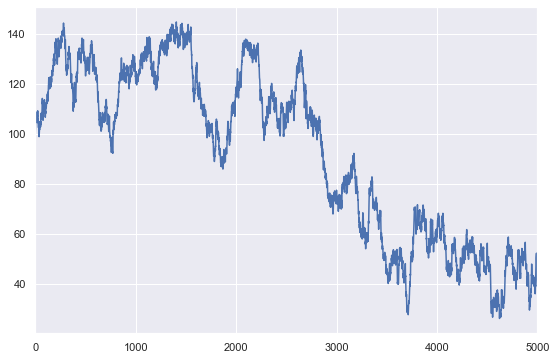

In [104]:
a = ((pd.Series(fbm(n=999, hurst=0.15, length=1, method='daviesharte')) + 1) * 100)
print(a.shape)
a.plot(figsize=(9, 6)) 
plt.show()

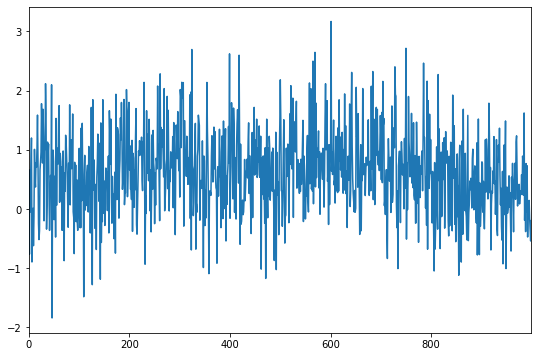

In [59]:
b = pd.Series(fbm(n=999, hurst=0.01, length=1, method='daviesharte'))
b.plot(figsize=(9, 6))

In [60]:
d = a + b

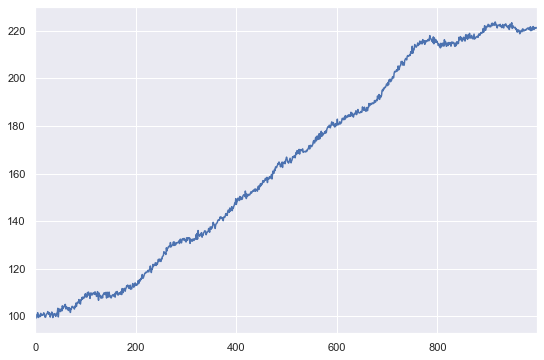

In [71]:
d.plot(figsize=(9, 6))
plt.show()

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fbm import fbm, fgn, times


def hurst(ts_raw, graph=False, min_lag=2, max_lag=20):
    """
    For a price series exhibiting geometric random walk, H = 0.5. But for a mean-reverting series, H < 0.5,
    and for a trending series, H > 0.5. As H decreases toward zero, the price series is more mean reverting,
    and as H increases toward 1, the price series is increasingly trending; thus, H serves also as an
    indicator for the degree of mean reversion or trendiness.
    """

    from numpy import log, polyfit, sqrt, std, subtract
    import seaborn as sns
    
    ts = np.array(ts_raw.values)
    
    sns.set()
    
    lag1, lag2 = min_lag, max_lag
    lags = range(lag1, lag2)
    tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]
    m = polyfit(log(lags), log(tau), 1)
    hurst = m[0] * 2
    print('hurst = ', hurst)
    
    if graph:
        plt.scatter(log(lags), log(tau))
        plt.show()
        
    return hurst


hurst =  0.7264336442560665


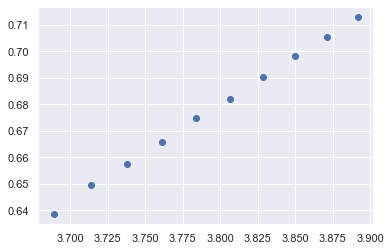

0.7264336442560665

In [101]:
hurst(d, min_lag=40, max_lag=50, graph=True)

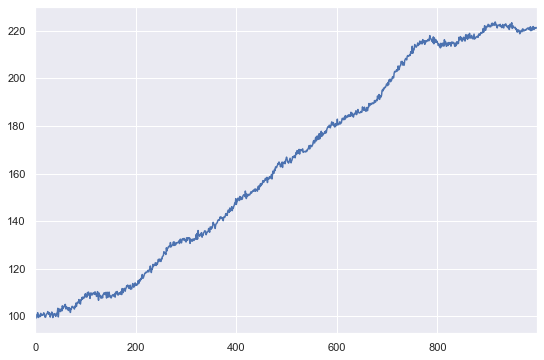

In [95]:
d.plot(figsize=(9, 6))
plt.show()